In [1]:
 import pandas as pd
 import numpy as np

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
inputs=df.drop('Survived',axis='columns')
target=df.Survived

In [5]:
dumies=pd.get_dummies(inputs.Sex)
dumies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [6]:
inputs=pd.concat([inputs,dumies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [7]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)


,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [8]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [9]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [10]:
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.2)

In [12]:
import tensorflow as tf
from tensorflow import keras

# Create the ANN model
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')  # For binary classification
])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 2.1266 - accuracy: 0.5764 - val_loss: 0.8435 - val_accuracy: 0.5594
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7636 - accuracy: 0.6889 - val_loss: 0.8294 - val_accuracy: 0.5874
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6141 - accuracy: 0.6872 - val_loss: 0.6454 - val_accuracy: 0.6084
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.6907 - val_loss: 0.6691 - val_accuracy: 0.6434
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 0.5728 - accuracy: 0.7065 - val_loss: 0.6432 - val_accuracy: 0.6014
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.6977 - val_loss: 0.6356 - val_accuracy: 0.6364
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.5510 - accuracy: 0.7065 - val_loss: 0.6340 - val_accuracy: 0.6154
Epoch 8/100


In [16]:
validation_loss, validation_accuracy = model.evaluate(X_test, y_test)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

6/6 [==============================] - 0s 4ms/step - loss: 0.4762 - accuracy: 0.7765
Validation Loss: 0.47619757056236267
Validation Accuracy: 0.7765362858772278


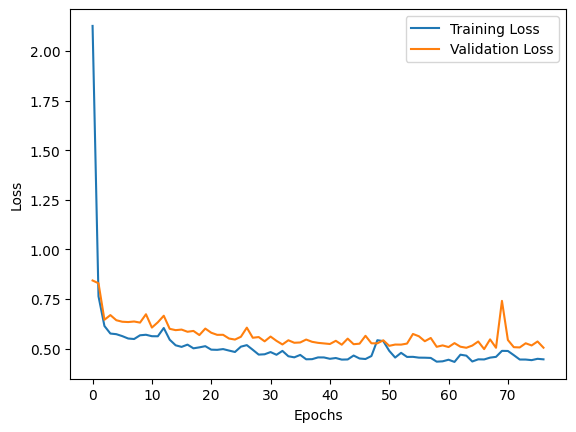

In [17]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 0s 3ms/step - loss: 0.4762 - accuracy: 0.7765
Test Loss: 0.47619757056236267
Test Accuracy: 0.7765362858772278




```
# This is formatted as code
```

___________________________________
after changing the parameters such as no of neurons and test train size and checking model performance
___________________________________


In [19]:
m = keras.Sequential([
    keras.layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1]),
    keras.layers.Dense(units=10, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')  # For binary classification
])

In [20]:
m.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
history = m.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.4,callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 3s 86ms/step - loss: 1.6858 - accuracy: 0.3841 - val_loss: 0.7568 - val_accuracy: 0.6351
Epoch 2/100
14/14 [==============================] - 0s 25ms/step - loss: 0.7327 - accuracy: 0.6628 - val_loss: 0.8511 - val_accuracy: 0.5930
Epoch 3/100
14/14 [==============================] - 0s 34ms/step - loss: 0.6424 - accuracy: 0.6721 - val_loss: 0.6937 - val_accuracy: 0.6526
Epoch 4/100
14/14 [==============================] - 0s 34ms/step - loss: 0.6335 - accuracy: 0.6932 - val_loss: 0.6753 - val_accuracy: 0.6561
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6153 - accuracy: 0.6885 - val_loss: 0.6733 - val_accuracy: 0.6632
Epoch 6/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6129 - accuracy: 0.6862 - val_loss: 0.6558 - val_accuracy: 0.6667
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 0.6019 - accuracy: 0.6885 - val_loss: 0.6578 - val_accuracy: 0.6667
Epoch 

In [22]:
validation_loss, validation_accuracy = m.evaluate(X_test, y_test)
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7765
Validation Loss: 0.4696826934814453
Validation Accuracy: 0.7765362858772278


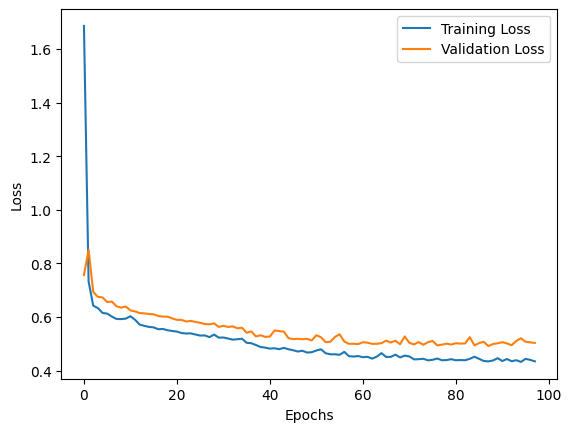

In [23]:
import matplotlib.pyplot as plt

# Plot training loss and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


6/6 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7765
Test Loss: 0.47619757056236267
Test Accuracy: 0.7765362858772278


In [26]:
model.predict([[3,	22.0,	7.2500,	0]])

1/1 [==============================] - 0s 219ms/step


array([[0.10399623]], dtype=float32)

In [27]:
m.predict([[3,	22.0,	7.2500,	0]])

1/1 [==============================] - 0s 58ms/step


array([[0.09732132]], dtype=float32)